In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import seaborn as sns; sns.set()
from datetime import datetime
import calendar
import os
import psycopg2
import re
import plotly.express as px
import plotly.graph_objects as go

pd.set_option('display.max_rows', 6000)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

pd.options.display.float_format = '{:,.2f}'.format

data_dir = '../../data/'

data_raw_dir = '../../../data/'

In [2]:
df_casos = pd.read_csv(data_dir + 'epidemic/regionais-cwb/dados_regional_casos.csv', header=None, parse_dates=[0])

df_casos.columns=['Data', 'Regional', 'Casos']

df_casos

Data          Regional  Casos
0  2020-07-03       bairro novo    567
1  2020-07-03         boa vista    672
2  2020-07-03         boqueirao    502
3  2020-07-03            cajuru    480
4  2020-07-03               cic    550
5  2020-07-03            matriz    944
6  2020-07-03       pinheirinho    443
7  2020-07-03            portao    584
8  2020-07-03  santa felicidade    576
9  2020-07-03         tatuquara    268
10 2020-06-05       bairro novo     84
11 2020-06-05         boa vista    150
12 2020-06-05         boqueirao    108
13 2020-06-05            cajuru     85
14 2020-06-05               cic     83
15 2020-06-05            matriz    292
16 2020-06-05       pinheirinho     74
17 2020-06-05            portao    120
18 2020-06-05  santa felicidade    130
19 2020-06-05         tatuquara     32
20 2020-07-10       bairro novo    803
21 2020-07-10         boa vista    988
22 2020-07-10         boqueirao    793
23 2020-07-10            cajuru    781
24 2020-07-10               cic    896
25 2020-07-10            matriz   1208
26 2020-07-10       pinheirinho    703
27 2020-07-10            portao    803
28 2020-07-10  santa felicidade    814
29 2020-07-10         tatuquara    444
30 2020-06-12       bairro novo    124
31 2020-06-12         boa vista    185
32 2020-06-12         boqueirao    132
33 2020-06-12            cajuru    119
34 2020-06-12               cic    123
35 2020-06-12            matriz    345
36 2020-06-12       pinheirinho     97
37 2020-06-12            portao    164
38 2020-06-12  santa felicidade    176
39 2020-06-12         tatuquara     52
40 2020-05-15       bairro novo     36
41 2020-05-15         boa vista     92
42 2020-05-15         boqueirao     70
43 2020-05-15            cajuru     56
44 2020-05-15               cic     45
45 2020-05-15            matriz    197
46 2020-05-15       pinheirinho     29
47 2020-05-15            portao     94
48 2020-05-15  santa felicidade    110
49 2020-05-15         tatuquara     11
50 2020-07-17       bairro novo   1039
51 2020-07-17         boa vista   1391
52 2020-07-17         boqueirao   1112
53 2020-07-17            cajuru   1109
54 2020-07-17               cic   1230
55 2020-07-17            matriz   1486
56 2020-07-17       pinheirinho    962
57 2020-07-17            portao   1091
58 2020-07-17  santa felicidade   1119
59 2020-07-17         tatuquara    577
60 2020-06-19       bairro novo    150
61 2020-06-19         boa vista    205
62 2020-06-19         boqueirao    149
63 2020-06-19            cajuru    152
64 2020-06-19               cic    139
65 2020-06-19            matriz    452
66 2020-06-19       pinheirinho    103
67 2020-06-19            portao    191
68 2020-06-19  santa felicidade    194
69 2020-06-19         tatuquara    102
70 2020-05-22       bairro novo     45
71 2020-05-22         boa vista    111
72 2020-05-22         boqueirao     77
73 2020-05-22            cajuru     63
74 2020-05-22               cic     54
75 2020-05-22            matriz    207
76 2020-05-22       pinheirinho     40
77 2020-05-22            portao    104
78 2020-05-22  santa felicidade    115
79 2020-05-22         tatuquara     14
80 2020-06-26       bairro novo    338
81 2020-06-26         boa vista    458
82 2020-06-26         boqueirao    304
83 2020-06-26            cajuru    307
84 2020-06-26               cic    335
85 2020-06-26            matriz    765
86 2020-06-26       pinheirinho    246
87 2020-06-26            portao    397
88 2020-06-26  santa felicidade    461
89 2020-06-26         tatuquara    197
90 2020-05-29       bairro novo     56
91 2020-05-29         boa vista    137
92 2020-05-29         boqueirao     88
93 2020-05-29            cajuru     76
94 2020-05-29               cic     63
95 2020-05-29            matriz    234
96 2020-05-29       pinheirinho     53
97 2020-05-29            portao    128
98 2020-05-29  santa felicidade    139
99 2020-05-29         tatuquara     24

In [3]:
df_obitos = pd.read_csv(data_dir + 'epidemic/regionais-cwb/dados_regional_obitos.csv', header=None, parse_dates=[0])

df_obitos.columns=['Data', 'Regional', 'Obitos']

df_obitos

Data          Regional  Obitos
0  2020-07-03       bairro novo       9
1  2020-07-03         boa vista      13
2  2020-07-03         boqueirao      11
3  2020-07-03            cajuru       8
4  2020-07-03               cic       8
5  2020-07-03            matriz      19
6  2020-07-03       pinheirinho      11
7  2020-07-03            portao       8
8  2020-07-03  santa felicidade       9
9  2020-07-03         tatuquara       3
10 2020-07-10       bairro novo      25
11 2020-07-10         boa vista      28
12 2020-07-10         boqueirao      31
13 2020-07-10            cajuru      24
14 2020-07-10               cic      25
15 2020-07-10            matriz      34
16 2020-07-10       pinheirinho      21
17 2020-07-10            portao      20
18 2020-07-10  santa felicidade      20
19 2020-07-10         tatuquara       5
20 2020-06-12       bairro novo       8
21 2020-06-12         boa vista       7
22 2020-06-12         boqueirao       9
23 2020-06-12            cajuru       5
24 2020-06-12               cic       4
25 2020-06-12            matriz      14
26 2020-06-12       pinheirinho       9
27 2020-06-12            portao       8
28 2020-06-12  santa felicidade       7
29 2020-06-12         tatuquara       3
30 2020-07-17       bairro novo      30
31 2020-07-17         boa vista      44
32 2020-07-17         boqueirao      40
33 2020-07-17            cajuru      37
34 2020-07-17               cic      31
35 2020-07-17            matriz      46
36 2020-07-17       pinheirinho      29
37 2020-07-17            portao      28
38 2020-07-17  santa felicidade      26
39 2020-07-17         tatuquara      12
40 2020-06-19       bairro novo       9
41 2020-06-19         boa vista      13
42 2020-06-19         boqueirao      11
43 2020-06-19            cajuru       8
44 2020-06-19               cic       8
45 2020-06-19            matriz      19
46 2020-06-19       pinheirinho      11
47 2020-06-19            portao       8
48 2020-06-19  santa felicidade       9
49 2020-06-19         tatuquara       3
50 2020-06-26       bairro novo       9
51 2020-06-26         boa vista      13
52 2020-06-26         boqueirao      11
53 2020-06-26            cajuru       8
54 2020-06-26               cic       8
55 2020-06-26            matriz      19
56 2020-06-26       pinheirinho      11
57 2020-06-26            portao       8
58 2020-06-26  santa felicidade       9
59 2020-06-26         tatuquara       3

In [4]:
df_orig = df_casos.merge(df_obitos, how='left')

df_orig = df_orig.sort_values(['Data', 'Regional'])

df_orig

Data          Regional  Casos  Obitos
40 2020-05-15       bairro novo     36     nan
41 2020-05-15         boa vista     92     nan
42 2020-05-15         boqueirao     70     nan
43 2020-05-15            cajuru     56     nan
44 2020-05-15               cic     45     nan
45 2020-05-15            matriz    197     nan
46 2020-05-15       pinheirinho     29     nan
47 2020-05-15            portao     94     nan
48 2020-05-15  santa felicidade    110     nan
49 2020-05-15         tatuquara     11     nan
70 2020-05-22       bairro novo     45     nan
71 2020-05-22         boa vista    111     nan
72 2020-05-22         boqueirao     77     nan
73 2020-05-22            cajuru     63     nan
74 2020-05-22               cic     54     nan
75 2020-05-22            matriz    207     nan
76 2020-05-22       pinheirinho     40     nan
77 2020-05-22            portao    104     nan
78 2020-05-22  santa felicidade    115     nan
79 2020-05-22         tatuquara     14     nan
90 2020-05-29       bairro novo     56     nan
91 2020-05-29         boa vista    137     nan
92 2020-05-29         boqueirao     88     nan
93 2020-05-29            cajuru     76     nan
94 2020-05-29               cic     63     nan
95 2020-05-29            matriz    234     nan
96 2020-05-29       pinheirinho     53     nan
97 2020-05-29            portao    128     nan
98 2020-05-29  santa felicidade    139     nan
99 2020-05-29         tatuquara     24     nan
10 2020-06-05       bairro novo     84     nan
11 2020-06-05         boa vista    150     nan
12 2020-06-05         boqueirao    108     nan
13 2020-06-05            cajuru     85     nan
14 2020-06-05               cic     83     nan
15 2020-06-05            matriz    292     nan
16 2020-06-05       pinheirinho     74     nan
17 2020-06-05            portao    120     nan
18 2020-06-05  santa felicidade    130     nan
19 2020-06-05         tatuquara     32     nan
30 2020-06-12       bairro novo    124    8.00
31 2020-06-12         boa vista    185    7.00
32 2020-06-12         boqueirao    132    9.00
33 2020-06-12            cajuru    119    5.00
34 2020-06-12               cic    123    4.00
35 2020-06-12            matriz    345   14.00
36 2020-06-12       pinheirinho     97    9.00
37 2020-06-12            portao    164    8.00
38 2020-06-12  santa felicidade    176    7.00
39 2020-06-12         tatuquara     52    3.00
60 2020-06-19       bairro novo    150    9.00
61 2020-06-19         boa vista    205   13.00
62 2020-06-19         boqueirao    149   11.00
63 2020-06-19            cajuru    152    8.00
64 2020-06-19               cic    139    8.00
65 2020-06-19            matriz    452   19.00
66 2020-06-19       pinheirinho    103   11.00
67 2020-06-19            portao    191    8.00
68 2020-06-19  santa felicidade    194    9.00
69 2020-06-19         tatuquara    102    3.00
80 2020-06-26       bairro novo    338    9.00
81 2020-06-26         boa vista    458   13.00
82 2020-06-26         boqueirao    304   11.00
83 2020-06-26            cajuru    307    8.00
84 2020-06-26               cic    335    8.00
85 2020-06-26            matriz    765   19.00
86 2020-06-26       pinheirinho    246   11.00
87 2020-06-26            portao    397    8.00
88 2020-06-26  santa felicidade    461    9.00
89 2020-06-26         tatuquara    197    3.00
0  2020-07-03       bairro novo    567    9.00
1  2020-07-03         boa vista    672   13.00
2  2020-07-03         boqueirao    502   11.00
3  2020-07-03            cajuru    480    8.00
4  2020-07-03               cic    550    8.00
5  2020-07-03            matriz    944   19.00
6  2020-07-03       pinheirinho    443   11.00
7  2020-07-03            portao    584    8.00
8  2020-07-03  santa felicidade    576    9.00
9  2020-07-03         tatuquara    268    3.00
20 2020-07-10       bairro novo    803   25.00
21 2020-07-10         boa vista    988   28.00
22 2020-07-10         boqueirao    793   31.00
23 2020-07-10            cajuru    781   24.00
24 2020-07-10 

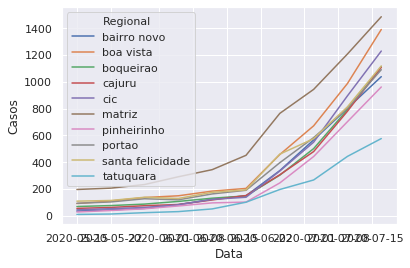

In [5]:
sns.lineplot(x='Data', y='Casos', hue='Regional', data=df_orig)

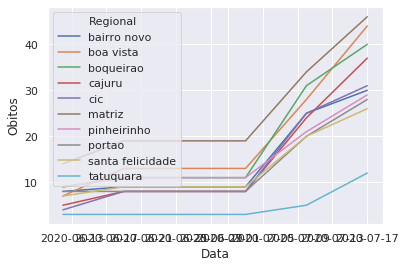

In [6]:
sns.lineplot(x='Data', y='Obitos', hue='Regional', data=df_orig)

In [7]:
dates = pd.date_range(df_orig['Data'].min(), df_orig['Data'].max(), freq='D')

index = pd.MultiIndex.from_product([df_orig['Regional'].unique(), dates])

index

MultiIndex([('bairro novo', '2020-05-15'),
            ('bairro novo', '2020-05-16'),
            ('bairro novo', '2020-05-17'),
            ('bairro novo', '2020-05-18'),
            ('bairro novo', '2020-05-19'),
            ('bairro novo', '2020-05-20'),
            ('bairro novo', '2020-05-21'),
            ('bairro novo', '2020-05-22'),
            ('bairro novo', '2020-05-23'),
            ('bairro novo', '2020-05-24'),
            ...
            (  'tatuquara', '2020-07-08'),
            (  'tatuquara', '2020-07-09'),
            (  'tatuquara', '2020-07-10'),
            (  'tatuquara', '2020-07-11'),
            (  'tatuquara', '2020-07-12'),
            (  'tatuquara', '2020-07-13'),
            (  'tatuquara', '2020-07-14'),
            (  'tatuquara', '2020-07-15'),
            (  'tatuquara', '2020-07-16'),
            (  'tatuquara', '2020-07-17')],
           length=640)

In [8]:
df_orig = df_orig.set_index(['Regional', 'Data']).reindex(index).reset_index().rename(columns={'level_0':'Regional', 'level_1':'Data'})

df_orig

Regional       Data    Casos  Obitos
0         bairro novo 2020-05-15    36.00     nan
1         bairro novo 2020-05-16      nan     nan
2         bairro novo 2020-05-17      nan     nan
3         bairro novo 2020-05-18      nan     nan
4         bairro novo 2020-05-19      nan     nan
5         bairro novo 2020-05-20      nan     nan
6         bairro novo 2020-05-21      nan     nan
7         bairro novo 2020-05-22    45.00     nan
8         bairro novo 2020-05-23      nan     nan
9         bairro novo 2020-05-24      nan     nan
10        bairro novo 2020-05-25      nan     nan
11        bairro novo 2020-05-26      nan     nan
12        bairro novo 2020-05-27      nan     nan
13        bairro novo 2020-05-28      nan     nan
14        bairro novo 2020-05-29    56.00     nan
15        bairro novo 2020-05-30      nan     nan
16        bairro novo 2020-05-31      nan     nan
17        bairro novo 2020-06-01      nan     nan
18        bairro novo 2020-06-02      nan     nan
19        bairro novo 2020-06-03      nan     nan
20        bairro novo 2020-06-04      nan     nan
21        bairro novo 2020-06-05    84.00     nan
22        bairro novo 2020-06-06      nan     nan
23        bairro novo 2020-06-07      nan     nan
24        bairro novo 2020-06-08      nan     nan
25        bairro novo 2020-06-09      nan     nan
26        bairro novo 2020-06-10      nan     nan
27        bairro novo 2020-06-11      nan     nan
28        bairro novo 2020-06-12   124.00    8.00
29        bairro novo 2020-06-13      nan     nan
30        bairro novo 2020-06-14      nan     nan
31        bairro novo 2020-06-15      nan     nan
32        bairro novo 2020-06-16      nan     nan
33        bairro novo 2020-06-17      nan     nan
34        bairro novo 2020-06-18      nan     nan
35        bairro novo 2020-06-19   150.00    9.00
36        bairro novo 2020-06-20      nan     nan
37        bairro novo 2020-06-21      nan     nan
38        bairro novo 2020-06-22      nan     nan
39        bairro novo 2020-06-23      nan     nan
40        bairro novo 2020-06-24      nan     nan
41        bairro novo 2020-06-25      nan     nan
42        bairro novo 2020-06-26   338.00    9.00
43        bairro novo 2020-06-27      nan     nan
44        bairro novo 2020-06-28      nan     nan
45        bairro novo 2020-06-29      nan     nan
46        bairro novo 2020-06-30      nan     nan
47        bairro novo 2020-07-01      nan     nan
48        bairro novo 2020-07-02      nan     nan
49        bairro novo 2020-07-03   567.00    9.00
50        bairro novo 2020-07-04      nan     nan
51        bairro novo 2020-07-05      nan     nan
52        bairro novo 2020-07-06      nan     nan
53        bairro novo 2020-07-07      nan     nan
54        bairro novo 2020-07-08      nan     nan
55        bairro novo 2020-07-09      nan     nan
56        bairro novo 2020-07-10   803.00   25.00
57        bairro novo 2020-07-11      nan     nan
58        bairro novo 2020-07-12      nan     nan
59        bairro novo 2020-07-13      nan     nan
60        bairro novo 2020-07-14      nan     nan
61        bairro novo 2020-07-15      nan     nan
62        bairro novo 2020-07-16      nan     nan
63        bairro novo 2020-07-17 1,039.00   30.00
64          boa vista 2020-05-15    92.00     nan
65          boa vista 2020-05-16      nan     nan
66          boa vista 2020-05-17      nan     nan
67          boa vista 2020-05-18      nan     nan
68          boa vista 2020-05-19      nan     nan
69          boa vista 2020-05-20      nan     nan
70          boa vista 2020-05-21      nan     nan
71          boa vista 2020-05-22   111.00     nan
72          boa vista 2020-05-23      nan     nan
73          boa vista 2020-05-24      nan     nan
74          boa vista 2020-05-25      nan     nan
75          boa vista 2020-05-26      nan     nan
76          boa vista 2020-05-27      nan     nan
77          boa vista 2020-05-28      nan     nan
78          boa vista 2020-05-29   137.00     nan
79          b

In [9]:
df_orig_inter = df_orig.groupby(['Regional']).apply(lambda group: group.interpolate(method='polynomial', order=2))

df_orig_inter

Regional       Data    Casos  Obitos
0         bairro novo 2020-05-15    36.00     nan
1         bairro novo 2020-05-16    37.31     nan
2         bairro novo 2020-05-17    38.61     nan
3         bairro novo 2020-05-18    39.91     nan
4         bairro novo 2020-05-19    41.19     nan
5         bairro novo 2020-05-20    42.47     nan
6         bairro novo 2020-05-21    43.74     nan
7         bairro novo 2020-05-22    45.00     nan
8         bairro novo 2020-05-23    46.25     nan
9         bairro novo 2020-05-24    47.49     nan
10        bairro novo 2020-05-25    48.73     nan
11        bairro novo 2020-05-26    50.00     nan
12        bairro novo 2020-05-27    51.62     nan
13        bairro novo 2020-05-28    53.61     nan
14        bairro novo 2020-05-29    56.00     nan
15        bairro novo 2020-05-30    58.77     nan
16        bairro novo 2020-05-31    61.93     nan
17        bairro novo 2020-06-01    65.47     nan
18        bairro novo 2020-06-02    69.42     nan
19        bairro novo 2020-06-03    73.81     nan
20        bairro novo 2020-06-04    78.67     nan
21        bairro novo 2020-06-05    84.00     nan
22        bairro novo 2020-06-06    89.79     nan
23        bairro novo 2020-06-07    96.05     nan
24        bairro novo 2020-06-08   102.77     nan
25        bairro novo 2020-06-09   109.75     nan
26        bairro novo 2020-06-10   115.72     nan
27        bairro novo 2020-06-11   120.47     nan
28        bairro novo 2020-06-12   124.00    8.00
29        bairro novo 2020-06-13   126.32    8.18
30        bairro novo 2020-06-14   127.41    8.34
31        bairro novo 2020-06-15   127.29    8.50
32        bairro novo 2020-06-16   126.68    8.64
33        bairro novo 2020-06-17   129.90    8.77
34        bairro novo 2020-06-18   137.67    8.89
35        bairro novo 2020-06-19   150.00    9.00
36        bairro novo 2020-06-20   166.88    9.10
37        bairro novo 2020-06-21   188.33    9.18
38        bairro novo 2020-06-22   214.32    9.25
39        bairro novo 2020-06-23   244.35    9.31
40        bairro novo 2020-06-24   275.23    9.29
41        bairro novo 2020-06-25   306.45    9.18
42        bairro novo 2020-06-26   338.00    9.00
43        bairro novo 2020-06-27   369.88    8.73
44        bairro novo 2020-06-28   402.10    8.38
45        bairro novo 2020-06-29   434.65    7.95
46        bairro novo 2020-06-30   467.52    7.52
47        bairro novo 2020-07-01   500.54    7.51
48        bairro novo 2020-07-02   533.70    8.00
49        bairro novo 2020-07-03   567.00    9.00
50        bairro novo 2020-07-04   600.44   10.50
51        bairro novo 2020-07-05   634.01   12.51
52        bairro novo 2020-07-06   667.73   15.02
53        bairro novo 2020-07-07   701.56   17.93
54        bairro novo 2020-07-08   735.39   20.61
55        bairro novo 2020-07-09   769.21   22.97
56        bairro novo 2020-07-10   803.00   25.00
57        bairro novo 2020-07-11   836.77   26.70
58        bairro novo 2020-07-12   870.53   28.07
59        bairro novo 2020-07-13   904.26   29.11
60        bairro novo 2020-07-14   937.98   29.83
61        bairro novo 2020-07-15   971.67   30.21
62        bairro novo 2020-07-16 1,005.34   30.27
63        bairro novo 2020-07-17 1,039.00   30.00
64          boa vista 2020-05-15    92.00     nan
65          boa vista 2020-05-16    93.99     nan
66          boa vista 2020-05-17    96.21     nan
67          boa vista 2020-05-18    98.68     nan
68          boa vista 2020-05-19   101.40     nan
69          boa vista 2020-05-20   104.36     nan
70          boa vista 2020-05-21   107.56     nan
71          boa vista 2020-05-22   111.00     nan
72          boa vista 2020-05-23   114.69     nan
73          boa vista 2020-05-24   118.62     nan
74          boa vista 2020-05-25   122.79     nan
75          boa vista 2020-05-26   127.10     nan
76          boa vista 2020-05-27   130.96     nan
77          boa vista 2020-05-28   134.26     nan
78          boa vista 2020-05-29   137.00     nan
79          b

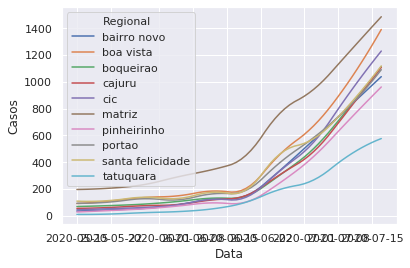

In [10]:
sns.lineplot(x='Data', y='Casos', hue='Regional', data=df_orig_inter)

In [11]:
df_orig_inter_daily = df_orig_inter.groupby(['Regional'])[['Casos', 'Obitos']].apply(lambda group: group - group.shift(1))

df_orig_inter_daily.columns = [x+'Novos' for x in df_orig_inter_daily.columns]

df_orig_inter_daily

CasosNovos  ObitosNovos
0           nan          nan
1          1.31          nan
2          1.30          nan
3          1.29          nan
4          1.29          nan
5          1.28          nan
6          1.27          nan
7          1.26          nan
8          1.25          nan
9          1.24          nan
10         1.23          nan
11         1.28          nan
12         1.61          nan
13         2.00          nan
14         2.39          nan
15         2.77          nan
16         3.16          nan
17         3.54          nan
18         3.94          nan
19         4.40          nan
20         4.86          nan
21         5.33          nan
22         5.79          nan
23         6.26          nan
24         6.72          nan
25         6.98          nan
26         5.97          nan
27         4.75          nan
28         3.53          nan
29         2.32         0.18
30         1.10         0.17
31        -0.12         0.15
32        -0.62         0.14
33         3.22         0.13
34         7.77         0.12
35        12.33         0.11
36        16.88         0.10
37        21.44         0.08
38        26.00         0.07
39        30.02         0.05
40        30.88        -0.02
41        31.22        -0.10
42        31.55        -0.18
43        31.88        -0.27
44        32.22        -0.35
45        32.55        -0.43
46        32.86        -0.44
47        33.02        -0.01
48        33.16         0.49
49        33.30         1.00
50        33.44         1.50
51        33.58         2.01
52        33.71         2.51
53        33.83         2.91
54        33.83         2.69
55        33.81         2.36
56        33.79         2.03
57        33.77         1.70
58        33.75         1.37
59        33.73         1.04
60        33.71         0.71
61        33.69         0.39
62        33.67         0.06
63        33.66        -0.27
64          nan          nan
65         1.99          nan
66         2.23          nan
67         2.47          nan
68         2.71          nan
69         2.96          nan
70         3.20          nan
71         3.44          nan
72         3.69          nan
73         3.93          nan
74         4.17          nan
75         4.32          nan
76         3.86          nan
77         3.30          nan
78         2.74          nan
79         2.18          nan
80         1.62          nan
81         1.07          nan
82         0.70          nan
83         1.49          nan
84         2.48          nan
85         3.46          nan
86         4.44          nan
87         5.43          nan
88         6.41          nan
89         7.05          nan
90         5.64          nan
91         3.89          nan
92         2.13          nan
93         0.38         1.26
94        -1.37         1.12
95        -3.13         0.99
96        -3.77         0.86
97         2.21         0.72
98         9.30         0.59
99        16.39         0.46
100       23.47         0.32
101       30.56         0.19
102       37.65         0.06
103       43.51        -0.06
104       42.00        -0.12
105       39.27        -0.17
106       36.53        -0.22
107       33.79        -0.27
108       31.06        -0.32
109       28.32        -0.36
110       26.30        -0.35
111       28.55         0.01
112       31.51         0.43
113       34.48         0.86
114       37.44         1.28
115       40.40         1.70
116       43.37         2.12
117       46.16         2.49
118       47.94         2.51
119       49.54         2.47
120       51.15         2.43
121       52.75         2.40
122       54.36         2.36
123       55.97         2.32
124       57.57         2.29
125       59.18         2.25
126       60.78         2.21
127       62.39         2.17
128         nan          nan
129        0.80          nan
130        0.87          nan
131        0.93          nan
132        1.00          nan
133        1.07          nan
134        1.13          nan
135        1.20          nan
136        1.26          nan
137

In [12]:
df_orig_full = df_orig_inter.join(df_orig_inter_daily)

df_orig_full

Regional       Data    Casos  Obitos  CasosNovos  ObitosNovos
0         bairro novo 2020-05-15    36.00     nan         nan          nan
1         bairro novo 2020-05-16    37.31     nan        1.31          nan
2         bairro novo 2020-05-17    38.61     nan        1.30          nan
3         bairro novo 2020-05-18    39.91     nan        1.29          nan
4         bairro novo 2020-05-19    41.19     nan        1.29          nan
5         bairro novo 2020-05-20    42.47     nan        1.28          nan
6         bairro novo 2020-05-21    43.74     nan        1.27          nan
7         bairro novo 2020-05-22    45.00     nan        1.26          nan
8         bairro novo 2020-05-23    46.25     nan        1.25          nan
9         bairro novo 2020-05-24    47.49     nan        1.24          nan
10        bairro novo 2020-05-25    48.73     nan        1.23          nan
11        bairro novo 2020-05-26    50.00     nan        1.28          nan
12        bairro novo 2020-05-27    51.62     nan        1.61          nan
13        bairro novo 2020-05-28    53.61     nan        2.00          nan
14        bairro novo 2020-05-29    56.00     nan        2.39          nan
15        bairro novo 2020-05-30    58.77     nan        2.77          nan
16        bairro novo 2020-05-31    61.93     nan        3.16          nan
17        bairro novo 2020-06-01    65.47     nan        3.54          nan
18        bairro novo 2020-06-02    69.42     nan        3.94          nan
19        bairro novo 2020-06-03    73.81     nan        4.40          nan
20        bairro novo 2020-06-04    78.67     nan        4.86          nan
21        bairro novo 2020-06-05    84.00     nan        5.33          nan
22        bairro novo 2020-06-06    89.79     nan        5.79          nan
23        bairro novo 2020-06-07    96.05     nan        6.26          nan
24        bairro novo 2020-06-08   102.77     nan        6.72          nan
25        bairro novo 2020-06-09   109.75     nan        6.98          nan
26        bairro novo 2020-06-10   115.72     nan        5.97          nan
27        bairro novo 2020-06-11   120.47     nan        4.75          nan
28        bairro novo 2020-06-12   124.00    8.00        3.53          nan
29        bairro novo 2020-06-13   126.32    8.18        2.32         0.18
30        bairro novo 2020-06-14   127.41    8.34        1.10         0.17
31        bairro novo 2020-06-15   127.29    8.50       -0.12         0.15
32        bairro novo 2020-06-16   126.68    8.64       -0.62         0.14
33        bairro novo 2020-06-17   129.90    8.77        3.22         0.13
34        bairro novo 2020-06-18   137.67    8.89        7.77         0.12
35        bairro novo 2020-06-19   150.00    9.00       12.33         0.11
36        bairro novo 2020-06-20   166.88    9.10       16.88         0.10
37        bairro novo 2020-06-21   188.33    9.18       21.44         0.08
38        bairro novo 2020-06-22   214.32    9.25       26.00         0.07
39        bairro novo 2020-06-23   244.35    9.31       30.02         0.05
40        bairro novo 2020-06-24   275.23    9.29       30.88        -0.02
41        bairro novo 2020-06-25   306.45    9.18       31.22        -0.10
42        bairro novo 2020-06-26   338.00    9.00       31.55        -0.18
43        bairro novo 2020-06-27   369.88    8.73       31.88        -0.27
44        bairro novo 2020-06-28   402.10    8.38       32.22        -0.35
45        bairro novo 2020-06-29   434.65    7.95       32.55        -0.43
46        bairro novo 2020-06-30   467.52    7.52       32.86        -0.44
47        bairro novo 2020-07-01   500.54    7.51       33.02        -0.01
48        bairro novo 2020-07-02   533.70    8.00       33.16         0.49
49        bairro novo 2020-07-03   567.00    9.00       33.30         1.00
50        bairro novo 2020-07-04   600.44   10.50       33.44         1.50
51        bairro novo 2020-07-05   634.01   12.51       33.58         2.01
52        bairro novo 2020-07-06   667

In [13]:
sns.lineplot(x='Data', y='CasosNovos', hue='Regional', data=df_orig_full)

In [14]:
sns.lineplot(x='Data', y='ObitosNovos', hue='Regional', data=df_orig_full)

In [15]:
df_orig_full.to_csv(data_dir + 'epidemic/regionais-cwb/cases_interp.csv', index=False)